In [51]:
#aula 01 explore dados com pandas

In [52]:
import pandas as pd

In [53]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [54]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [56]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [57]:
df.shape

(133349, 11)

In [58]:
linhas, colunas = df.shape[0], df.shape[1]
print('Linhas:', linhas)
print('Colunas:', colunas)

Linhas: 133349
Colunas: 11


In [59]:
df.columns


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [60]:
#prompt: traduza para mim todas as colunas do dataframe df para português brasileiro

df.rename(columns={
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}, inplace=True)

print("Colunas renomeadas com sucesso. Novas colunas:")
print(df.columns)

Colunas renomeadas com sucesso. Novas colunas:
Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')


In [61]:
df["senioridade"].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [62]:
df["contrato"].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [63]:
df['remoto'] = df['remoto'].replace({
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Totalmente Remoto'
})

print("Categorias da coluna 'remoto' atualizadas:")
print(df['remoto'].value_counts())

Categorias da coluna 'remoto' atualizadas:
remoto
Presencial           105312
Totalmente Remoto     27718
Híbrido                 319
Name: count, dtype: int64


In [64]:
df["tamanho_empresa"].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [65]:
#prompt:traduza para portugues as categorias da coluna "senioridade" do dataframe DF

df['senioridade'] = df['senioridade'].replace({
    'EN': 'Júnior',
    'MI': 'Pleno',
    'SE': 'Sênior',
    'EX': 'Executivo'
})

print("Categorias da coluna 'senioridade' atualizadas:")
print(df['senioridade'].value_counts())

Categorias da coluna 'senioridade' atualizadas:
senioridade
Sênior       77241
Pleno        40465
Júnior       12443
Executivo     3200
Name: count, dtype: int64


In [66]:
#prompt:traduza para portugues as categorias da coluna "contrato" do dataframe DF

df['contrato'] = df['contrato'].replace({
    'FT': 'Tempo Integral',
    'CT': 'Contrato',
    'PT': 'Tempo Parcial',
    'FL': 'Freelancer'
})

print("Categorias da coluna 'contrato' atualizadas:")
print(df['contrato'].value_counts())

Categorias da coluna 'contrato' atualizadas:
contrato
Tempo Integral    132563
Contrato             394
Tempo Parcial        376
Freelancer            16
Name: count, dtype: int64


In [67]:
#prompt:traduza para portugues as categorias da coluna "remoto" do dataframe DF

print(df['remoto'].value_counts())

remoto
Presencial           105312
Totalmente Remoto     27718
Híbrido                 319
Name: count, dtype: int64


In [68]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Totalmente Remoto,US,M
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Totalmente Remoto,US,M
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,M
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,M
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,M


In [69]:
df.describe(include="object")

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Sênior,Tempo Integral,Data Scientist,USD,US,Presencial,US,M
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [70]:
df.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


In [71]:
#aula 02 aprenda a limpar e preparar dados

In [72]:

df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [73]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Totalmente Remoto,US,M
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Totalmente Remoto,US,M
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,M
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,M
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,M


In [74]:
df.isnull().sum ()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [75]:
df["ano"].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [76]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Sênior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,M
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,M
59710,NaN,Júnior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,M
59759,NaN,Sênior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,M
59789,NaN,Sênior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,M
131000,NaN,Sênior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,M
131006,NaN,Sênior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,M
133054,NaN,Júnior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Totalmente Remoto,MY,L
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Totalmente Remoto,PL,L
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,L


In [77]:
# Criação de um dataframe de teste para usar de exemplo

import numpy as np

df_salarios = pd.DataFrame({
    'nome': ["Ana", "Bruno", "Carlos", "Daniele", "Val"],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
})

# calcula a média salarial e substitui os nulos pela média e arrededonda os valores
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

'''Calcula mediana e substitui os nulos pela mediana
'''

df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [78]:
df_temperaturas = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperatura": [30, np.nan, np.nan, 28, 27]
})

df_temperaturas["preenchido_ffill"] = df_temperaturas["Temperatura"].ffill()
df_temperaturas

,Dia,Temperatura,preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [79]:
df_cidades = pd.DataFrame({
    'nome': ["Ana", "Bruno", "Carlos", "Daniele", "Val"],
    'cidade': ["São Paulo", np.nan, "Curitiba", np.nan, "Belém"]
})

df_cidades['cidade_preenchida'] = df_cidades["cidade"].fillna("Não informado")
display(df_cidades)

,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não informado
4,Val,Belém,Belém


In [80]:
df_limpo = df.dropna()


In [81]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [82]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Totalmente Remoto,US,M
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Totalmente Remoto,US,M
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,M
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,M
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,M


In [83]:

df_limpo.info()


<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [84]:

df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

In [85]:
#aula 03 crie graficos e conte historias com dados

In [86]:
df_limpo.head ()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Totalmente Remoto,US,M
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Totalmente Remoto,US,M
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,M
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,M
4,2025,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,M


<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='senioridade'>

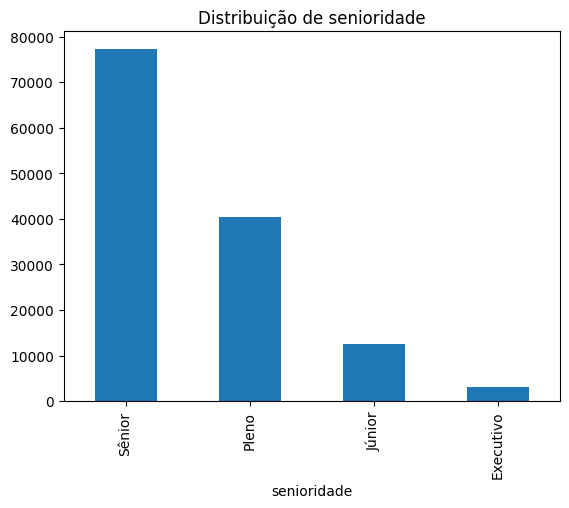

In [87]:

df_limpo['senioridade'].value_counts().plot(kind='bar', title="Distribuição de senioridade")


In [88]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

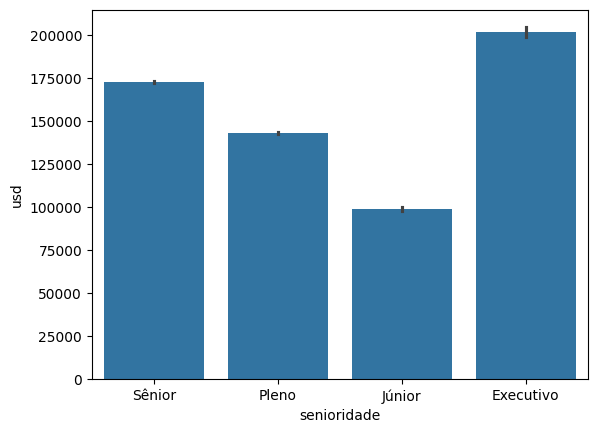

In [89]:
sns.barplot(data=df_limpo, x='senioridade', y='usd')

In [90]:

import matplotlib.pyplot as plt


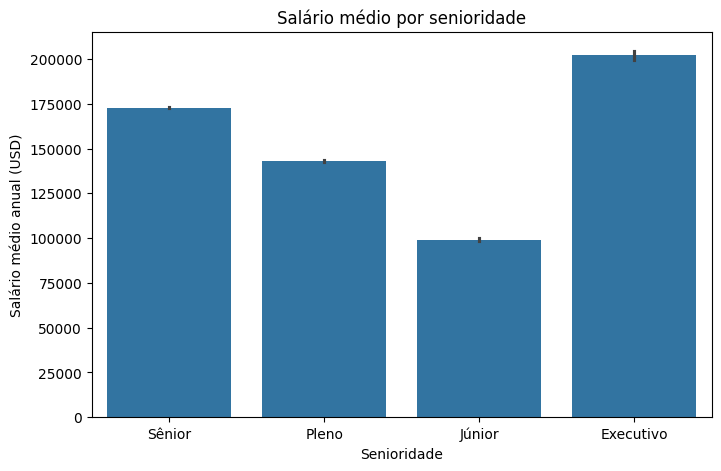

In [91]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()


In [92]:

df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
Executivo,202027.667813
Sênior,172850.838301
Pleno,143044.845979
Júnior,99034.963267


In [93]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index

In [94]:

ordem

Index(['Júnior', 'Pleno', 'Sênior', 'Executivo'], dtype='object', name='senioridade')

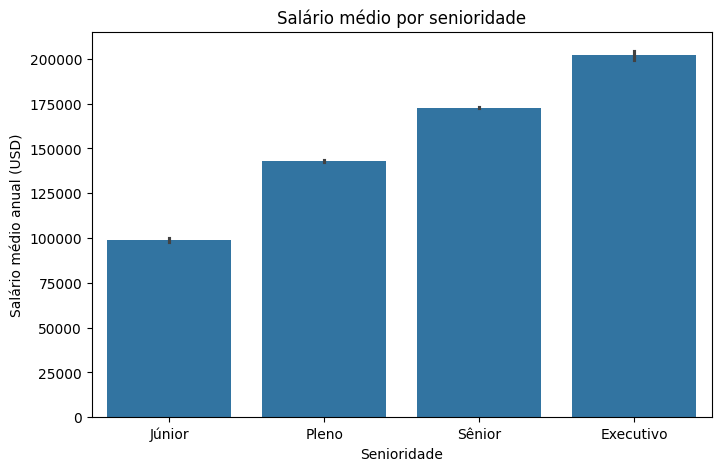

In [95]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem)
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()

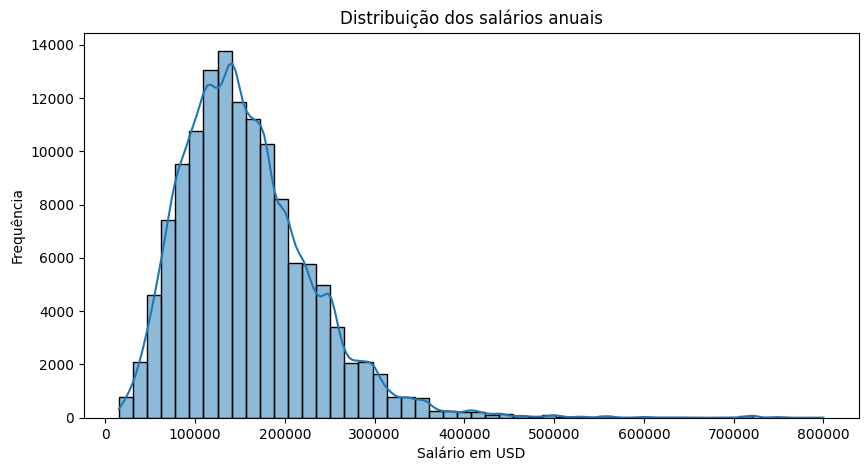

In [96]:

plt.figure(figsize=(10,5))
sns.histplot(df_limpo['usd'], bins = 50, kde=True)
plt.title("Distribuição dos salários anuais")
plt.xlabel("Salário em USD")
plt.ylabel("Frequência")
plt.show()

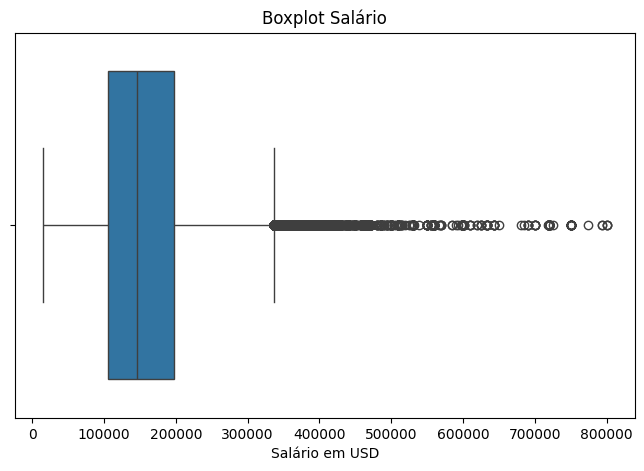

In [97]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['usd'])
plt.title("Boxplot Salário")
plt.xlabel("Salário em USD")
plt.show()



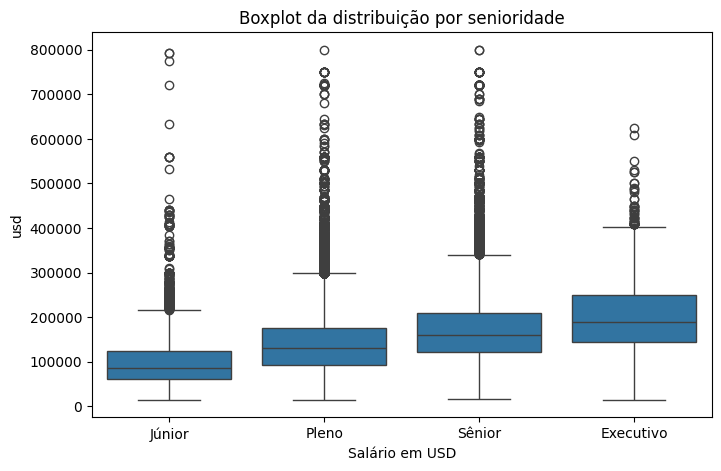

In [98]:
ordem_senioridade = ['Júnior', 'Pleno', 'Sênior', 'Executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade)
plt.title("Boxplot da distribuição por senioridade")
plt.xlabel("Salário em USD")
plt.show()

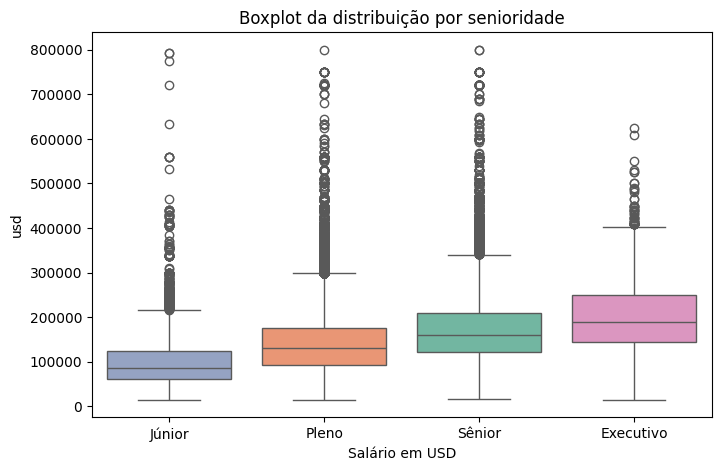

In [99]:
ordem_senioridade = ['Júnior', 'Pleno', 'Sênior', 'Executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title("Boxplot da distribuição por senioridade")
plt.xlabel("Salário em USD")
plt.show()

In [100]:
import plotly.express as px

In [101]:
# prompt: Crie um gráfico de média salarial por senioridade em barras usando o plotly

senioridade_media_salario = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario,
             x='senioridade',
             y='usd',
             title='Média Salarial por Senioridade',
             labels={'senioridade': 'Nível de Senioridade', 'usd': 'Média Salarial Anual (USD)'})

fig.show()

In [102]:

remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho'

          )

fig.show()


In [103]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
          )

fig.show()

In [104]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
          )
fig.update_traces(textinfo='percent+label')
fig.show()

In [105]:
#aula 04 construa um dashboard interativo

In [106]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Totalmente Remoto,US,M
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Totalmente Remoto,US,M
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,M
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,M
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,M


In [107]:
pip install pycountry

In [108]:
import pycountry

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()

In [109]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Totalmente Remoto,US,M,USA
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Totalmente Remoto,US,M,USA
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,M,AUS
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,M,AUS
4,2025,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,M,USA


In [110]:
df_limpo.to_csv('dados-imersao-final.csv', index=False)